Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.5655206600585774
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.248930181741672
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.1171996322804265
            Iterations: 6
            Function evaluations: 43
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.8088505276767757
            Iterations: 8
            Function evaluations: 73
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.460278116745838
            Iterations: 7
            Function evaluations: 8

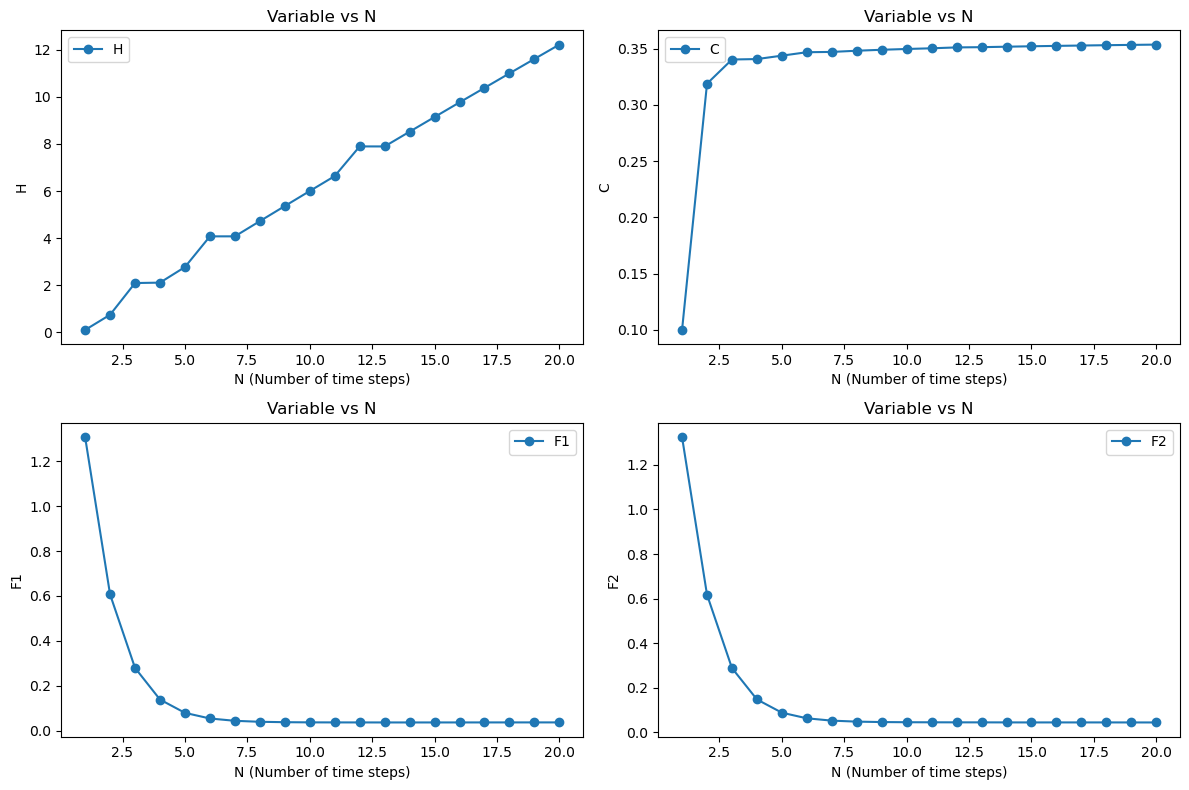

In [14]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Nonlinear system dynamics
def ode(x, t, u):
    H, C = x
    
    dHdt = 1 / 0.5 * (u[0] + u[1] - 0.125 * np.sqrt(H))
    dCdt = 1 / (0.5 * H) * (u[0] * (0.2 - C) + u[1] * (0.5 - C))
    
    return [dHdt, dCdt]

# MPC cost function
def mpc_cost(U, x0, Q, R, N):
    J = 0.0
    x_k = x0
    
    for k in range(N):
        u_k = U[2*k:2*(k+1)]
        x_k1 = odeint(ode, x_k, [0, 0.1], args=(u_k,))
        x_k = x_k1[-1]
        
        J += 0.5 * np.dot((x_k - np.array([1.55, 0.6])).T, np.dot(Q, (x_k - np.array([1., 0.4]))))
        J += 0.5 * np.dot(u_k.T, np.dot(R, u_k))
    
    return J

# MPC optimization
def mpc_optimization(Q, R, x0, N, umin, umax):
    u_init = np.array([1.2, 0.3] * N)  # Initial guess for input trajectory
    u_bounds = [(umin, umax)] * N * 2  # Bounds on the input trajectory

    # Call scipy.optimize.minimize to solve the MPC optimization problem
    sol = minimize(mpc_cost, u_init, args=(x0, Q, R, N), method='SLSQP', bounds=u_bounds, options={'eps': 1e-6, 'disp': True})

    # The optimized input trajectory is stored in sol.x
    U = sol.x.reshape((N, 2))
    
    return U

# Simulation parameters
N_values = np.arange(1, 21)  # Number of time steps
T = 0.1  # Time step
Q = np.array([[10, 0], [0, 1]])  # State cost matrix
R = np.array([[1, 0], [0, 1]])  # Input cost matrix
x0 = np.array([0.1, 0.1])  # Initial state
umin, umax = 0, 2  # Input constraints

# Lists to store variable values at each N
H_values = []
C_values = []
F1_values = []
F2_values = []

# Loop over different N values
for N in N_values:
    # Perform MPC
    U_optimal = mpc_optimization(Q, R, x0, N, umin, umax)

    # Simulate the system with the optimal input
    time = np.arange(0, N * T, T)
    X_optimal = odeint(ode, x0, time, args=(U_optimal[0],))
    
    # Store variable values at each N
    H_values.append(X_optimal[-1, 0])
    C_values.append(X_optimal[-1, 1])
    F1_values.append(U_optimal[-1, 0])
    F2_values.append(U_optimal[-1, 1])

# Plot the results
plt.figure(figsize=(12, 8))

# Plot H vs N
plt.subplot(2, 2, 1)
plt.plot(N_values, H_values, marker='o', linestyle='-', label='H')
plt.xlabel('N (Number of time steps)')
plt.ylabel('H')
plt.title('Variable vs N')
plt.legend()

# Plot C vs N
plt.subplot(2, 2, 2)
plt.plot(N_values, C_values, marker='o', linestyle='-', label='C')
plt.xlabel('N (Number of time steps)')
plt.ylabel('C')
plt.title('Variable vs N')
plt.legend()

# Plot F1 vs N
plt.subplot(2, 2, 3)
plt.plot(N_values, F1_values, marker='o', linestyle='-', label='F1')
plt.xlabel('N (Number of time steps)')
plt.ylabel('F1')
plt.title('Variable vs N')
plt.legend()

# Plot F2 vs N
plt.subplot(2, 2, 4)
plt.plot(N_values, F2_values, marker='o', linestyle='-', label='F2')
plt.xlabel('N (Number of time steps)')
plt.ylabel('F2')
plt.title('Variable vs N')
plt.legend()

plt.tight_layout()
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.5655206600585774
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.248930181741672
            Iterations: 6
            Function evaluations: 30
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4.1171996322804265
            Iterations: 6
            Function evaluations: 43
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.8088505276767757
            Iterations: 8
            Function evaluations: 73
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.460278116745838
            Iterations: 7
            Function evaluations: 8

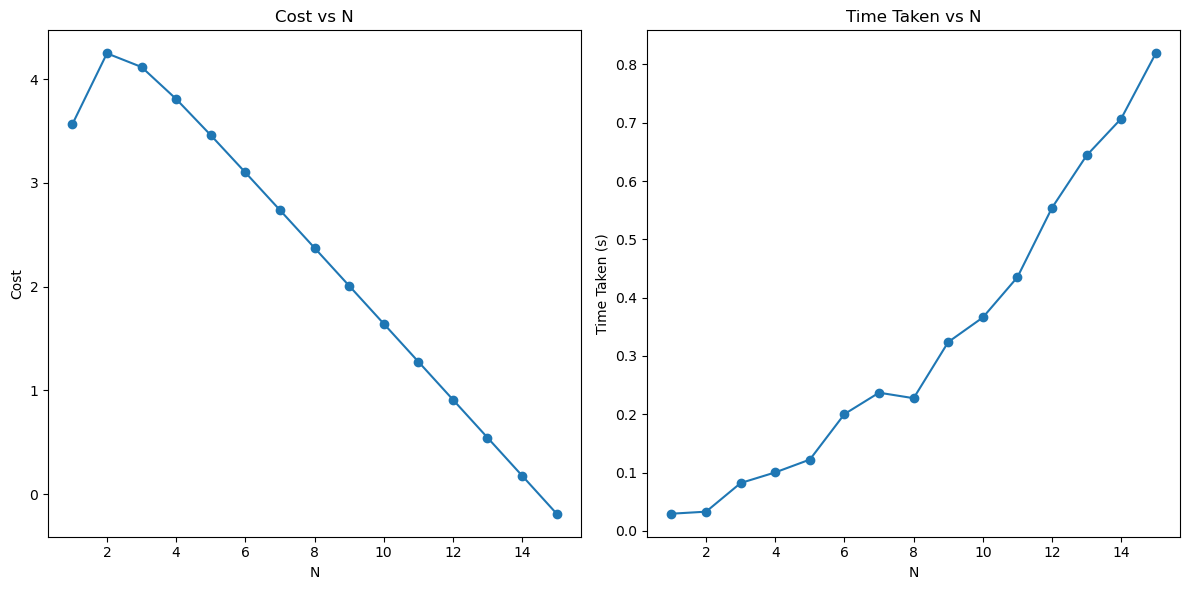

In [52]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import time

# Nonlinear system dynamics
def ode(x, t, u):
    H, C = x
    dHdt = 1 / 0.5 * (u[0] + u[1] - 0.125 * np.sqrt(H))
    dCdt = 1 / (0.5 * H) * (u[0] * (0.2 - C) + u[1] * (0.5 - C))
    return [dHdt, dCdt]

# MPC cost function
def mpc_cost(U, x0, Q, R, N):
    J = 0.0
    x_k = x0
    for k in range(N):
        u_k = U[2*k:2*(k+1)]
        x_k1 = odeint(ode, x_k, [0, 0.1], args=(u_k,))
        x_k = x_k1[-1]
        J += 0.5 * np.dot((x_k - np.array([1.55, 0.6])).T, np.dot(Q, (x_k - np.array([1., 0.4]))))
        J += 0.5 * np.dot(u_k.T, np.dot(R, u_k))
    return J

# MPC optimization with time recording
def mpc_optimization_with_time(Q, R, x0, N, umin, umax):
    u_init = np.array([1.2, 0.3] * N)  # Initial guess for input trajectory
    u_bounds = [(umin, umax)] * N * 2  # Bounds on the input trajectory

    start_time = time.time()

    # Call scipy.optimize.minimize to solve the MPC optimization problem
    sol = minimize(mpc_cost, u_init, args=(x0, Q, R, N), method='SLSQP', bounds=u_bounds, options={'eps': 1e-6, 'disp': True})

    end_time = time.time()
    elapsed_time = end_time - start_time

    return elapsed_time, sol

# Simulation parameters
T = 0.1  # Time step
Q = np.array([[10, 0], [0, 1]])  # State cost matrix
R = np.array([[1, 0], [0, 1]])  # Input cost matrix
x0 = np.array([0.1, 0.1])  # Initial state
umin, umax = 0, 2  # Input constraints

# Number of time steps for optimization
max_N = 15

# Record time and cost for different N
time_taken = []
cost_values = []

for N in range(1, max_N + 1):
    elapsed_time, sol = mpc_optimization_with_time(Q, R, x0, N, umin, umax)
    cost_values.append(sol.fun)
    time_taken.append(elapsed_time)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot cost vs N
plt.subplot(1, 2, 1)
plt.plot(range(1, max_N + 1), cost_values, marker='o')
plt.xlabel('N')
plt.ylabel('Cost')
plt.title('Cost vs N')

# Plot time taken vs N
plt.subplot(1, 2, 2)
plt.plot(range(1, max_N + 1), time_taken, marker='o')
plt.xlabel('N')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken vs N')

plt.tight_layout()
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 15.53310738072756
            Iterations: 12
            Function evaluations: 499
            Gradient evaluations: 12


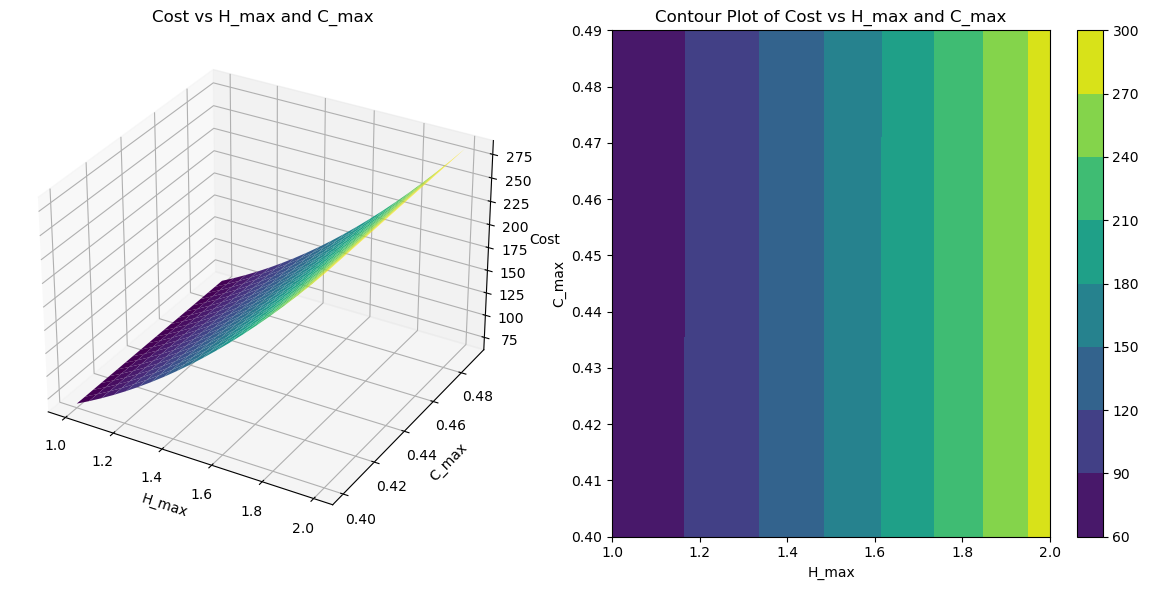

In [25]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Nonlinear system dynamics
def ode(x, t, u):
    H, C = x
    dHdt = 1 / 0.5 * (u[0] + u[1] - 0.125 * np.sqrt(H))
    dCdt = 1 / (0.5 * H) * (u[0] * (0.2 - C) + u[1] * (0.5 - C))
    return [dHdt, dCdt]

# MPC cost function
def mpc_cost(U, x0, Q, R, N):
    J = 0.0
    x_k = x0
    for k in range(N):
        u_k = U[2*k:2*(k+1)]
        x_k1 = odeint(ode, x_k, [0, 0.1], args=(u_k,))
        x_k = x_k1[-1]
        J += 0.5 * np.dot((x_k - np.array([2, 0.49])).T, np.dot(Q, (x_k - np.array([2, 0.49]))))
        J += 0.5 * np.dot(u_k.T, np.dot(R, u_k))
    return J

# MPC optimization
def mpc_optimization(Q, R, x0, N, umin, umax):
    u_init = np.array([1.2, 0.3] * N)  # Initial guess for input trajectory
    u_bounds = [(umin, umax)] * N * 2  # Bounds on the input trajectory

    # Call scipy.optimize.minimize to solve the MPC optimization problem
    sol = minimize(mpc_cost, u_init, args=(x0, Q, R, N), method='SLSQP', bounds=u_bounds, options={'eps': 1e-6, 'disp': True})

    # The optimized input trajectory is stored in sol.x
    U = sol.x.reshape((N, 2))
    
    return U

# Simulation parameters
N = 20  # Number of time steps
T = 0.1  # Time step
Q = np.array([[10, 0], [0, 1]])  # State cost matrix
R = np.array([[1, 0], [0, 1]])  # Input cost matrix
x0 = np.array([0.1, 0.1])  # Initial state
umin, umax = 0, 2  # Input constraints

# Perform MPC
U_optimal = mpc_optimization(Q, R, x0, N, umin, umax)

# Simulate the system with the optimal input
time = np.arange(0, N * T, T)
X_optimal = odeint(ode, x0, time, args=(U_optimal[0],))

# Vary the maximum values of H and C
H_max_values = np.linspace(1, 2, 20)
C_max_values = np.linspace(0.4, 0.49, 20)

# Record cost values
cost_values = np.zeros((len(H_max_values), len(C_max_values)))

for i, H_max in enumerate(H_max_values):
    for j, C_max in enumerate(C_max_values):
        x_max = np.array([H_max, C_max])
        cost_values[i, j] = mpc_cost(U_optimal.flatten(), x_max, Q, R, N)

# Plot the results
fig = plt.figure(figsize=(12, 6))

# Plot cost vs H_max and C_max
ax = fig.add_subplot(1, 2, 1, projection='3d')
H_max_grid, C_max_grid = np.meshgrid(H_max_values, C_max_values)
ax.plot_surface(H_max_grid, C_max_grid, cost_values.T, cmap='viridis')
ax.set_xlabel('H_max')
ax.set_ylabel('C_max')
ax.set_zlabel('Cost')
ax.set_title('Cost vs H_max and C_max')

# Plot the results in four separate graphs
ax = fig.add_subplot(1, 2, 2)
cp = ax.contourf(H_max_grid, C_max_grid, cost_values.T, cmap='viridis')
plt.colorbar(cp)
ax.set_xlabel('H_max')
ax.set_ylabel('C_max')
ax.set_title('Contour Plot of Cost vs H_max and C_max')

plt.tight_layout()
plt.show()


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2578533507859902
            Iterations: 11
            Function evaluations: 455
            Gradient evaluations: 11
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.3223014880356884
            Iterations: 12
            Function evaluations: 496
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4238428708704641
            Iterations: 14
            Function evaluations: 579
            Gradient evaluations: 14
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5798045035529095
            Iterations: 15
            Function evaluations: 620
            Gradient evaluations: 15
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.7902976074460906
            Iterations: 16
            Function

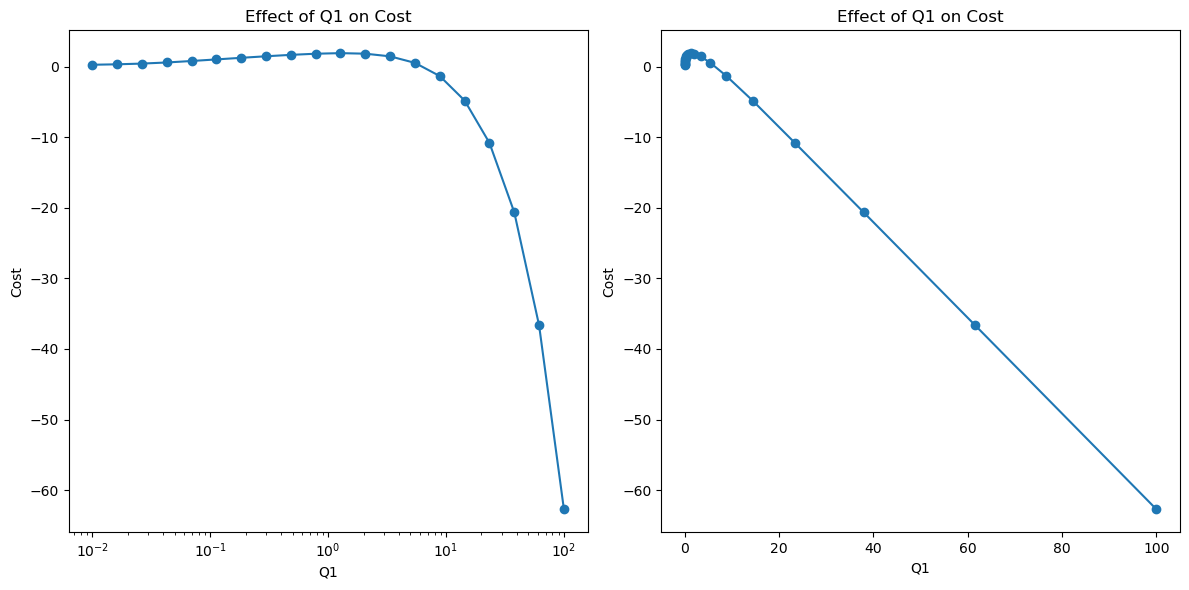

In [26]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Nonlinear system dynamics
def ode(x, t, u):
    H, C = x
    dHdt = 1 / 0.5 * (u[0] + u[1] - 0.125 * np.sqrt(H))
    dCdt = 1 / (0.5 * H) * (u[0] * (0.2 - C) + u[1] * (0.5 - C))
    return [dHdt, dCdt]

# MPC cost function
def mpc_cost(U, x0, Q, R, N):
    J = 0.0
    x_k = x0
    for k in range(N):
        u_k = U[2*k:2*(k+1)]
        x_k1 = odeint(ode, x_k, [0, 0.1], args=(u_k,))
        x_k = x_k1[-1]
        J += 0.5 * np.dot((x_k - np.array([1.55, 0.6])).T, np.dot(Q, (x_k - np.array([1., 0.4]))))
        J += 0.5 * np.dot(u_k.T, np.dot(R, u_k))
    return J

# MPC optimization
def mpc_optimization(Q, R, x0, N, umin, umax):
    u_init = np.array([1.2, 0.3] * N)  # Initial guess for input trajectory
    u_bounds = [(umin, umax)] * N * 2  # Bounds on the input trajectory

    # Call scipy.optimize.minimize to solve the MPC optimization problem
    sol = minimize(mpc_cost, u_init, args=(x0, Q, R, N), method='SLSQP', bounds=u_bounds, options={'eps': 1e-6, 'disp': True})

    # The optimized input trajectory is stored in sol.x
    U = sol.x.reshape((N, 2))
    
    return U

# Simulation parameters
N = 20  # Number of time steps
T = 0.1  # Time step
R = np.array([[1, 0], [0, 1]])  # Input cost matrix
x0 = np.array([0.1, 0.1])  # Initial state
umin, umax = 0, 2  # Input constraints

# Vary the first diagonal element of Q
Q1_values = np.logspace(-2, 2, 20)  # Varying from 0.01 to 100

# Record cost values
cost_values = np.zeros(len(Q1_values))

for i, Q1 in enumerate(Q1_values):
    Q = np.array([[Q1, 0], [0, 1]])  # Varying only the first diagonal element
    U_optimal = mpc_optimization(Q, R, x0, N, umin, umax)
    cost_values[i] = mpc_cost(U_optimal.flatten(), x0, Q, R, N)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot cost vs Q1
plt.subplot(1, 2, 1)
plt.semilogx(Q1_values, cost_values, marker='o')
plt.xlabel('Q1')
plt.ylabel('Cost')
plt.title('Effect of Q1 on Cost')

# Plot the results in four separate graphs
plt.subplot(1, 2, 2)
plt.plot(Q1_values, cost_values, marker='o')
plt.xlabel('Q1')
plt.ylabel('Cost')
plt.title('Effect of Q1 on Cost')

plt.tight_layout()
plt.show()


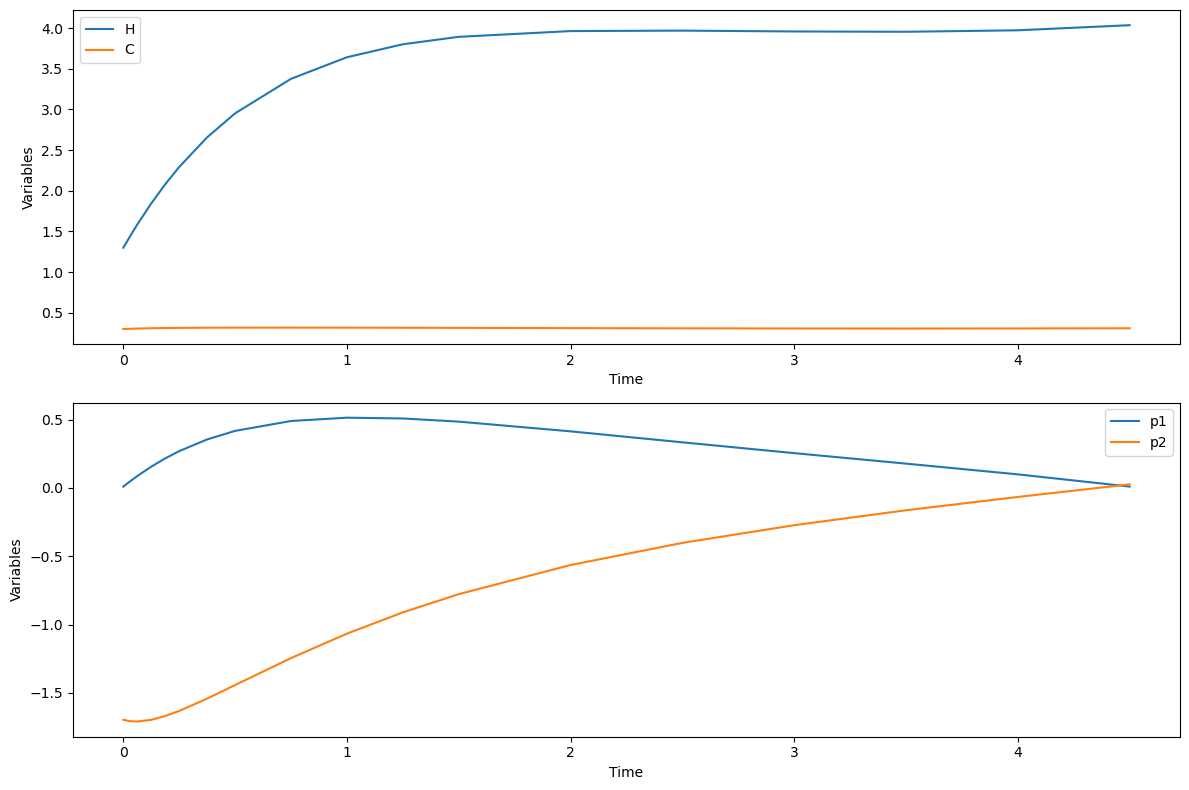

In [24]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def ode_system(t, y):
    x1, x2, p1, p2 = y
   
    eq1 = 0.3 - 4*p1 -2*p2*(0.7-x2)/x2
    eq2 = 1/x1*(((0.2-x2)*(0.1-2*p1-2*p2/x1*(0.2-x2))) +((0.5-x2)*(0.2-2*p1 -2*p2*(0.5-x2)/x1)))
    eq3 = -(0.564*x1 - 2.0143 -0.125/(x1**0.5) - (0.5*p2*(0.2-x2)/(x1**1.5)*(0.1-2*p1-2*p2/x1*(0.2-x2)))
                                               - ((0.5*p2*(0.5-x2)/(x1**1.5)*(0.2 - 2*p1 - 2*p2/x1*(0.5-x2)))))
   
    eq4 = - (2*x2 - 0.8 -(p2/x1*((0.1-2*p1-2*p2/x1*(0.2-x2)))) - (p2/x1*((0.2-2*p1 -2*p2*(0.5-x2)/x1))))
    return np.vstack((eq1, eq2, eq3, eq4))

def boundary_conditions(ya, yb):
    x1_0 = 1.3
    x2_0 = 0.3
    p1_at_final_time = 0.01
    p2_at_final_time = 0.01
   
    # Boundary conditions
    bc1 = ya[0] - x1_0
    bc2 = ya[1] - x2_0
    bc3 = ya[2] - p1_at_final_time
    bc4 = yb[2] - p2_at_final_time
   
    return np.array([bc1, bc2, bc3, bc4])

# Time grid
t_span = np.linspace(0, 4.5, 10)

# Initial guess for the solution
initial_guess = np.tile([0.8, 0.3, 0, 0], (t_span.size, 1)).T

# Solve the two-point boundary value problem
solution = solve_bvp(ode_system, boundary_conditions, t_span, initial_guess, max_nodes=10000)

# Extract the solution components
T_solution = solution.y[0]
C_solution = solution.y[1]
p1_solution = solution.y[2]
p2_solution = solution.y[3]

# Plot the results in two separate graphs
plt.figure(figsize=(12, 8))

# Plot H and C
plt.subplot(2, 1, 1)
plt.plot(solution.x, T_solution, label='H')
plt.plot(solution.x, C_solution, label='C')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()

# Plot p1 and p2
plt.subplot(2, 1, 2)
plt.plot(solution.x, p1_solution, label='p1')
plt.plot(solution.x, p2_solution, label='p2')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.legend()

plt.tight_layout()
plt.show()


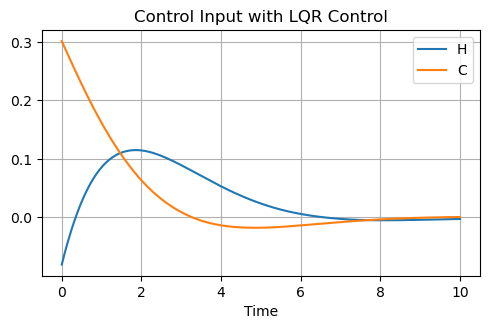

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
F1s = 0.05
F2s = 0.1
A = 0.5
k = 0.125
C1 = 0.2
C2 = 0.5

# Steady-state values
x_ss = np.array([1.44, 0.4])

# Given LQR controller gains
K = np.array([[0.27960122, -0.67954539],
              [0.40153781,  0.41598307]])

# Define the continuous-time dynamics with LQR control
def continuous_dynamics_lqr(t, x):
    H, C = x
    u = -K @ (x - x_ss)  # LQR control law
    dHdt = 1 / A * (F1s + F2s - k * np.sqrt(H)) + u[0]
    dCdt = 1 / (A * H) * (F1s * (C1 - C) + F2s * (C2 - C)) + u[1]
    return [dHdt, dCdt]

# Simulate the system with LQR control using solve_ivp
initial_state = np.array([1, 0.1])
solution = solve_ivp(continuous_dynamics_lqr, [0, 25], initial_state, method='RK45', dense_output=True)

# Plot the results
time_points = np.linspace(0, 10, 500)
states = solution.sol(time_points)

plt.figure(figsize=(5, 6))

# Plot state variables
#plt.subplot(2, 1, 1)
#plt.plot(time_points, states[0, :], label='H')
#plt.plot(time_points, states[1, :], label='C')
#plt.ylabel('State Value')
#plt.title('State Variables with LQR Control')
#plt.legend()
#plt.grid(True)

# Plot control input

plt.subplot(2, 1, 2)
control_input = -K @ (states - x_ss[:, np.newaxis])
plt.plot(time_points, control_input[0, :], label='H')
plt.xlabel('Time')
plt.title('Control Input with LQR Control')
plt.legend()
plt.grid(True)

plt.plot(time_points, control_input[1, :], label='C')
plt.xlabel('Time')
plt.title('Control Input with LQR Control')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
